# 1. Data Example

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

In [3]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 1, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 1, 0, 1, 'Normal']

In [4]:
df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,1,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,1,0,1,Normal


# 2. Split feature vectors and labels

In [5]:
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]

In [6]:
X

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,1,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,1,0,1


In [7]:
y = df[['body_shape']]

In [8]:
y

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal


# 3. Rescaling feature vectors to have the same scale

In [9]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [10]:
x_std

array([[-1.07556017,  0.        , -1.34164079, -1.02062073,  0.69337525],
       [ 0.15365145,  0.        ,  0.2236068 ,  0.40824829, -0.2773501 ],
       [ 0.69143154,  1.32287566,  0.2236068 ,  0.40824829, -1.24807544],
       [-0.92190872, -1.32287566,  0.2236068 , -1.02062073,  1.66410059],
       [ 1.84381743,  1.32287566,  1.78885438,  1.83711731, -1.24807544],
       [-0.99873444, -1.32287566, -1.34164079,  0.40824829,  0.69337525],
       [ 0.30730291,  0.        ,  0.2236068 , -1.02062073, -0.2773501 ]])

# 4. Covariance Matrix of features

In [11]:
import numpy as np

In [12]:
features = x_std.T
covariance_matrix = np.cov(features)

In [13]:
covariance_matrix

array([[ 1.16666667,  0.98243187,  1.0221359 ,  0.8415999 , -1.04407352],
       [ 0.98243187,  1.16666667,  0.69020931,  0.63007201, -1.0701241 ],
       [ 1.0221359 ,  0.69020931,  1.16666667,  0.63900965, -0.68735915],
       [ 0.8415999 ,  0.63007201,  0.63900965,  1.16666667, -0.79259392],
       [-1.04407352, -1.0701241 , -0.68735915, -0.79259392,  1.16666667]])

# 5. EigenVectors and EigenValues

In [14]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [15]:
print('Eigenvectors\n%s '%eig_vecs)

Eigenvectors
[[ 0.49825201  0.78790234 -0.30295398  0.1506206  -0.12840235]
 [ 0.45065167  0.02201424  0.68304608  0.22017104  0.53047264]
 [ 0.41212026 -0.4137995   0.10914642  0.45590366 -0.66269585]
 [ 0.39538866 -0.04603353  0.22432645 -0.84715077 -0.27122304]
 [-0.47168073  0.45318448  0.61598023  0.05766779 -0.4351826 ]] 


In [16]:
print('Eigenvalues\n%s'%eig_vals)

Eigenvalues
[4.55693071 0.00759971 0.08309226 0.56334362 0.62236704]


In [17]:
eig_vals[0] / eig_vals.sum()

0.7811881213521163

# 6. Project data point onto selected EigenVector

In [18]:
projected_X = x_std.dot(eig_vecs.T[0])

In [19]:
projected_X

array([-1.81941096,  0.46094748,  1.78292604, -2.15181214,  3.56713347,
       -1.81232991, -0.02745398])

In [20]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis']=0.0
result['label']=y
result

,PC1,y-axis,label
0,-1.819411,0.0,Skinny
1,0.460947,0.0,Normal
2,1.782926,0.0,Fat
3,-2.151812,0.0,Skinny
4,3.567133,0.0,Fat
5,-1.812330,0.0,Skinny
6,-0.027454,0.0,Normal


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

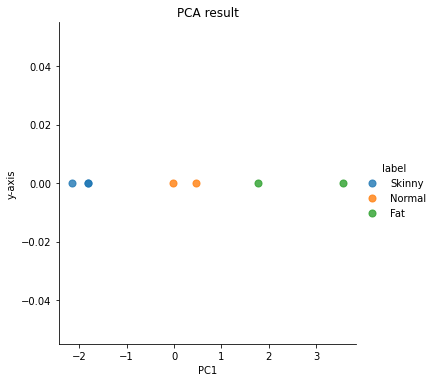

In [22]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,
          scatter_kws={'s':50}, hue='label')

plt.title('PCA result');

# *Scikit-learn PCA

In [23]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_X = pca.fit_transform(x_std)

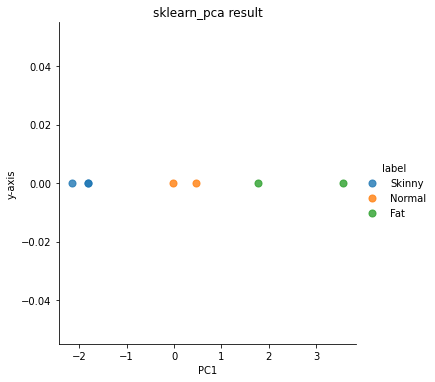

In [24]:
sklearn_result = pd.DataFrame(sklearn_pca_X, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = y
sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,
          scatter_kws={'s':50}, hue='label')
plt.title('sklearn_pca result')
plt.show()

In [25]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
sklearn_pca_X = pca.fit_transform(x_std)

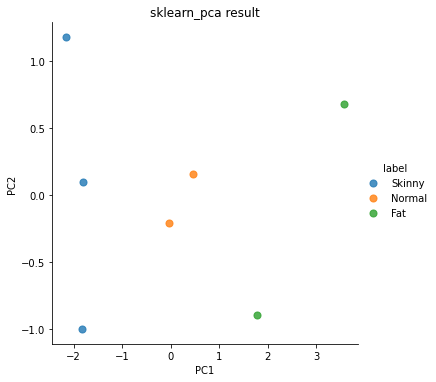

In [27]:
sklearn_result = pd.DataFrame(sklearn_pca_X, columns=['PC1', 'PC2'])
sklearn_result['label'] = y
sns.lmplot('PC1', 'PC2', data=sklearn_result, fit_reg=False,
          scatter_kws={'s':50}, hue='label')
plt.title('sklearn_pca result')
plt.show()